# Linear Regression Assigment-01 (submitted by-Ashad Amjad )

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# 1. Load the cars dataset.
df=pd.read_csv('autos_small.csv')
df.head()

price                                               name  \
0    400                                        Ford_Escort   
1   3500                                     Bmw_320_cabrio   
2   2200  Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...   
3   4000                                       A3_Limousine   
4   2600                         Smart_Smart_cabrio_450_cdi   

   yearOfRegistration  monthOfRegistration    gearbox  powerPS     model  \
0                1992                    8    manuell       89    escort   
1                1996                    0    manuell      150       3er   
2                1998                    0    manuell      150  c_klasse   
3                2006                    7    manuell        0        a3   
4                2002                    7  automatik       41    fortwo   

   kilometer fuelType          brand vehicleType  
0      60000   benzin           ford       kombi  
1     125000      NaN            bmw      cabrio  
2     150000   benzin  mercedes_benz       kombi  
3     150000   diesel           audi   limousine  
4     150000   diesel          smart      cabrio

In [3]:
df.shape #CHECKING HOW BIG IS DATA
df=df.drop_duplicates() #dropping any duplicates
df.shape #checking shape again to get how much duplicates were present

(9985, 11)

In [4]:
# 2. Figure out the best strategy to fill missing values
df.isnull().any() 
# As checked and found these columns [gearbox,model ,fuelType   vehicleType] have null value  
df.isnull().sum()


price                     0
name                      0
yearOfRegistration        0
monthOfRegistration       0
gearbox                 577
powerPS                   0
model                   566
kilometer                 0
fuelType                943
brand                     0
vehicleType            1050
dtype: int64

In [4]:
#filling nan with mode as these columns are categorical

Null_columns=['gearbox','model','fuelType','vehicleType']
for n in Null_columns:
     df[n]=df[n].fillna(df[n].mode)

In [5]:
# getting to understand the statistical overview of the integers column

df.describe()

price  yearOfRegistration  monthOfRegistration       powerPS  \
count  9.985000e+03         9985.000000          9985.000000   9985.000000   
mean   7.052178e+03         2003.630546             5.734902    121.960341   
std    1.238428e+05           40.454264             3.705793    342.338667   
min    0.000000e+00         1000.000000             0.000000      0.000000   
25%    1.150000e+03         1999.000000             3.000000     69.000000   
50%    2.995000e+03         2004.000000             6.000000    105.000000   
75%    7.200000e+03         2008.000000             9.000000    150.000000   
max    1.234568e+07         5000.000000            12.000000  17322.000000   

           kilometer  
count    9985.000000  
mean   125085.127692  
std     40557.423630  
min      5000.000000  
25%    100000.000000  
50%    150000.000000  
75%    150000.000000  
max    150000.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                9985 non-null   int64 
 1   name                 9985 non-null   object
 2   yearOfRegistration   9985 non-null   int64 
 3   monthOfRegistration  9985 non-null   int64 
 4   gearbox              9985 non-null   object
 5   powerPS              9985 non-null   int64 
 6   model                9985 non-null   object
 7   kilometer            9985 non-null   int64 
 8   fuelType             9985 non-null   object
 9   brand                9985 non-null   object
 10  vehicleType          9985 non-null   object
dtypes: int64(5), object(6)
memory usage: 936.1+ KB


# Handling outliers

From statistical overview only i got idea that these numerical columns have outliers.

1. Tried to remove outliers using IQR as well as selecting some values manually by looking at box plot.


In [6]:
#Decieded to remove outliers from the columns individually using iqr
#1.removing outliers from kilometer columns
q1=df['kilometer'].quantile(0.25)
q3=df['kilometer'].quantile(0.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR
new_df=df[(df['kilometer'] > 25000)&(df['kilometer'] <=q3)]
ll,ul

(25000.0, 225000.0)

In [9]:
new_df.shape # to check how much data is left after removing as low amount of data may affect model performance

(9573, 11)

{'whiskers': [<matplotlib.lines.Line2D at 0x14c81da73d0>,
 'caps': [<matplotlib.lines.Line2D at 0x14c81da7a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c81da7100>],
 'medians': [<matplotlib.lines.Line2D at 0x14c81da7f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c81db9220>],
 'means': []}

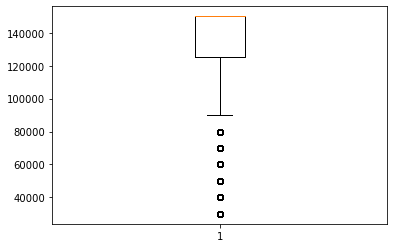

In [10]:
plt.boxplot(new_df['kilometer']) # checking if outliers still exist

(array([ 346.,  225.,  224.,  267.,  316.,  737.,    0., 1035.,    0.,
        6423.]),
 array([ 30000.,  42000.,  54000.,  66000.,  78000.,  90000., 102000.,
        114000., 126000., 138000., 150000.]),
 <BarContainer object of 10 artists>)

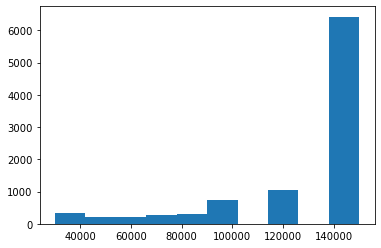

In [11]:
plt.hist(new_df['kilometer']) # looking at the data distribution of this column

In [7]:
#2--removing outliers from yearOfRegistration columns

q1=new_df['yearOfRegistration'].quantile(0.25)
q3=new_df['yearOfRegistration'].quantile(0.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR
new_df=new_df[(new_df['yearOfRegistration'] > ll)&(new_df['yearOfRegistration'] < ul)]

In [13]:
new_df.shape #to check how much data is left after removing as low amount of data may affect model performance

(9427, 11)

In [8]:
#3--removing outliers from price columns

q1=new_df['price'].quantile(0.25)
q3=new_df['price'].quantile(0.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR
new_df=new_df[(new_df['price'] >= 350)&(new_df['price'] <= ul)]
ll,ul,q1,q3,IQR

(-7550.0, 15650.0, 1150.0, 6950.0, 5800.0)

In [15]:
new_df.shape #to check how much data is left after removing as low amount of data may affect model performance

(8068, 11)

{'whiskers': [<matplotlib.lines.Line2D at 0x14c81f16910>,
 'caps': [<matplotlib.lines.Line2D at 0x14c81f16eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c81f16640>],
 'medians': [<matplotlib.lines.Line2D at 0x14c81f22490>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c81f22760>],
 'means': []}

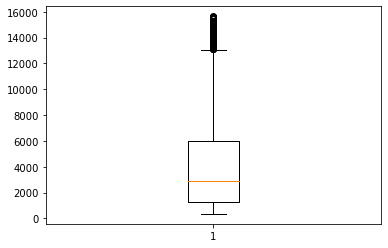

In [16]:
plt.boxplot(new_df['price'])  # checking if outliers still exist

In [9]:
#4--removing outliers from monthOfRegistration columns

q1=new_df['monthOfRegistration'].quantile(0.25)
q3=new_df['monthOfRegistration'].quantile(0.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR
new_df=new_df[(new_df['monthOfRegistration'] >=1)&(new_df['monthOfRegistration'] <=12)]

#Although i tried to remove outliers using IQR but still there were outliers present such as '0' month so 
# so decieded to keep only those data which have month from 1 to 12

In [18]:
new_df.shape  #to check how much data is left after removing as low amount of data may affect model performance

(7393, 11)

In [10]:
#4--removing outliers from powerPS columns

q1=new_df['powerPS'].quantile(0.25)
q3=new_df['powerPS'].quantile(0.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR
new_df=new_df[(new_df['powerPS'] > ll)&(new_df['powerPS'] < ul)]

In [20]:
new_df.shape  #to check how much data is left after removing as low amount of data may affect model performance

(7221, 11)

In [21]:
#looking at some statistical features of cleaned data

new_df.describe()

price  yearOfRegistration  monthOfRegistration      powerPS  \
count   7221.000000         7221.000000          7221.000000  7221.000000   
mean    4256.912339         2003.582468             6.465725   107.522088   
std     3670.651831            5.938374             3.327023    51.587155   
min      350.000000         1986.000000             1.000000     0.000000   
25%     1400.000000         1999.000000             4.000000    75.000000   
50%     2999.000000         2003.000000             6.000000   105.000000   
75%     6000.000000         2007.000000             9.000000   140.000000   
max    15650.000000         2018.000000            12.000000   243.000000   

           kilometer  
count    7221.000000  
mean   131994.183631  
std     31598.971186  
min     30000.000000  
25%    125000.000000  
50%    150000.000000  
75%    150000.000000  
max    150000.000000

{'whiskers': [<matplotlib.lines.Line2D at 0x14c81f91340>,
 'caps': [<matplotlib.lines.Line2D at 0x14c81f918e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c81f91070>],
 'medians': [<matplotlib.lines.Line2D at 0x14c81f91e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c81f9e190>],
 'means': []}

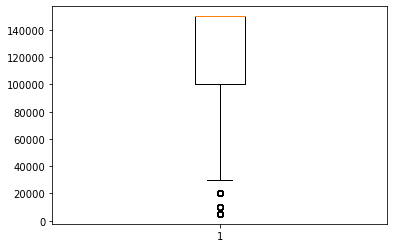

In [22]:
#ploted the box plot for kilometer columns so as to compare with cleaned data

plt.boxplot(df['kilometer'])

(array([ 241.,  335.,  182.,  449.,  267.,  645.,  408.,    0., 1035.,
        6423.]),
 array([  5000.,  19500.,  34000.,  48500.,  63000.,  77500.,  92000.,
        106500., 121000., 135500., 150000.]),
 <BarContainer object of 10 artists>)

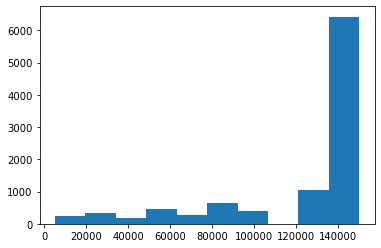

In [23]:
#understanding the data distribution in kilometer columns of old data

plt.hist(df['kilometer'])

(array([2495., 1461.,  902.,  647.,  559.,  361.,  265.,  195.,  203.,
         133.]),
 array([  350.,  1880.,  3410.,  4940.,  6470.,  8000.,  9530., 11060.,
        12590., 14120., 15650.]),
 <BarContainer object of 10 artists>)

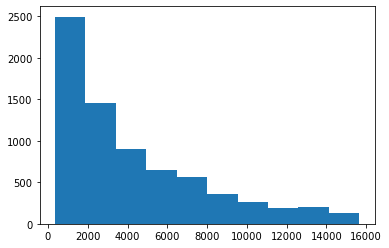

In [24]:
#understanding the data distribution in price columns of cleaned data

plt.hist(new_df['price'])

(array([ 202.,  126.,  147.,  184.,  227.,  544.,    0.,  830.,    0.,
        4961.]),
 array([ 30000.,  42000.,  54000.,  66000.,  78000.,  90000., 102000.,
        114000., 126000., 138000., 150000.]),
 <BarContainer object of 10 artists>)

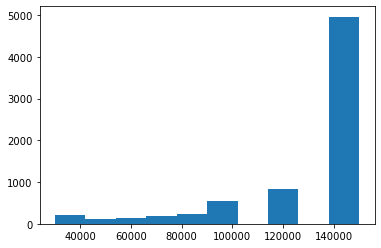

In [25]:
#understanding the data distribution in kilometer columns of cleaned data

plt.hist(new_df['kilometer'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14c8313a430>,
 'caps': [<matplotlib.lines.Line2D at 0x14c8313a9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c8313a160>],
 'medians': [<matplotlib.lines.Line2D at 0x14c8313af70>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c83146280>],
 'means': []}

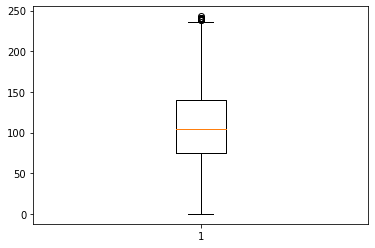

In [26]:
#checking if some outliers present even after removing it from powerPS columns

plt.boxplot(new_df['powerPS'])

In [27]:
# 4. Apply various regression models and find out which model is the best for this dataset

# Creating Model 

1.First decided to go with Multiple Linear Regression as we have to predict price which is having numrical values

In [11]:
#creating a new dataframe to work for  new model
dfm=new_df.copy()
dfm.head()

price                        name  yearOfRegistration  monthOfRegistration  \
0    400                 Ford_Escort                1992                    8   
3   4000                A3_Limousine                2006                    7   
4   2600  Smart_Smart_cabrio_450_cdi                2002                    7   
5   2222           BMW_318ti_compact                2001                   10   
6   4000      Toyota_Yaris_1.0_VVT_i                2008                   11   

     gearbox  powerPS   model  kilometer fuelType   brand vehicleType  
0    manuell       89  escort      60000   benzin    ford       kombi  
3    manuell        0      a3     150000   diesel    audi   limousine  
4  automatik       41  fortwo     150000   diesel   smart      cabrio  
5    manuell      143     3er     150000   benzin     bmw   limousine  
6    manuell       69   yaris     125000   benzin  toyota  kleinwagen

In [29]:
#checking the quantity of the final data

dfm.shape 

(7221, 11)

<AxesSubplot:>

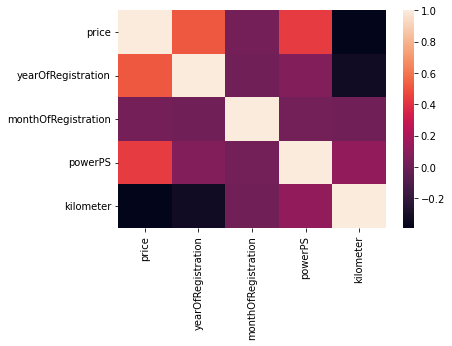

In [30]:
# Visualizing how columns are co-related for this i have used seaborn library

sns.heatmap(dfm.corr())

In [12]:
#decided to drop name columns as it has no such co-realtion and also while encoding no of rows would have increased

dfm.drop('name',axis=1,inplace=True)

In [13]:
dfm.head()


price  yearOfRegistration  monthOfRegistration    gearbox  powerPS   model  \
0    400                1992                    8    manuell       89  escort   
3   4000                2006                    7    manuell        0      a3   
4   2600                2002                    7  automatik       41  fortwo   
5   2222                2001                   10    manuell      143     3er   
6   4000                2008                   11    manuell       69   yaris   

   kilometer fuelType   brand vehicleType  
0      60000   benzin    ford       kombi  
3     150000   diesel    audi   limousine  
4     150000   diesel   smart      cabrio  
5     150000   benzin     bmw   limousine  
6     125000   benzin  toyota  kleinwagen

# Categorical Encoding

1. First encoded using LableEncoder
2. Then Tried using dummy

In [14]:
#encoding all the categorical columns using dummy variable



#name_dummy=pd.get_dummies(dfm['name'])
year_dummy=pd.get_dummies(dfm['yearOfRegistration'])
month_dummy=pd.get_dummies(dfm['monthOfRegistration'])
gearbox_dummy=pd.get_dummies(dfm['gearbox'])
model_dummy=pd.get_dummies(dfm['model'])
fuelType_dummy=pd.get_dummies(dfm['fuelType'])
brand_dummy=pd.get_dummies(dfm['brand'])
vehicleType_dummy=pd.get_dummies(dfm['vehicleType'])
#powerPS_dummy=pd.get_dummies(dfm['powerPS'])

In [15]:
#creating new dataframe by concating all the dummy variable and old dataframe


new_dfm=pd.concat([dfm,year_dummy,month_dummy,gearbox_dummy,model_dummy,fuelType_dummy,brand_dummy,vehicleType_dummy],axis=1)

In [16]:
#dropping the non encoded categorical features as some has object data type also


new_dfm.drop(['yearOfRegistration','monthOfRegistration','gearbox','model','fuelType','brand','vehicleType'],axis=1,inplace=True)

In [36]:
#trying to look at newly created encoded dataframe

new_dfm.head()



price  powerPS  kilometer  1986  1987  1988  1989  1990  1991  1992  ...  \
0    400       89      60000     0     0     0     0     0     0     1  ...   
3   4000        0     150000     0     0     0     0     0     0     0  ...   
4   2600       41     150000     0     0     0     0     0     0     0  ...   
5   2222      143     150000     0     0     0     0     0     0     0  ...   
6   4000       69     125000     0     0     0     0     0     0     0  ...   

   volvo  \
0      0   
3      0   
4      0   
5      0   
6      0   

   <bound method Series.mode of 0            kombi\n1           cabrio\n2            kombi\n3        limousine\n4           cabrio\n           ...    \n9995    kleinwagen\n9996           bus\n9997         kombi\n9998    kleinwagen\n9999     limousine\nName: vehicleType, Length: 9985, dtype: object>  \
0                                                  0                                                                                                                                                                                                                                                          
3                                                  0                                                                                                                                                                                                                                                          
4                                                  0                                                                                                                                                                                                                                                          
5                                                  0                                                                                                                                                                                                                                                          
6                                                  0                                                                                                                                                                                                                                                          

   andere  bus  cabrio  coupe  kleinwagen  kombi  limousine  suv  
0       0    0       0      0           0      1          0    0  
3       0    0       0      0           0      0          1    0  
4       0    0       1      0           0      0          0    0  
5       0    0       0      0           0      0          1    0  
6       0    0       0      0           1      0          0    0  

[5 rows x 322 columns]

In [17]:
# Extracting values of input features and outcome individually 




X=new_dfm.iloc[:,1:].values
y=new_dfm.iloc[:,0].values


In [18]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20,random_state=0)


In [19]:
#importing LinearRegression model and fitting with data


from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
#Executing the code for prediction of the outcome

y_pred=lr.predict(X_test)

In [22]:
#another metrics to check accuracy and error

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
rmse,r2

(1885.2938886131788, 0.7584678730364411)

# Note

1. My model reachd max to 0.92 lr.score while r2 score was .82, 
   but in that case the final dataset has very low quantity of data
   shape reduced from around 9k rows to 2.5k rows only so i decided to not use that set of data

2. While altering only two features kilometers and price columns my model accuracy score was changing.

3.I noticed as score was getting better my error was getting increased. 
  The least error i colud get my model to calculate was around 1k while r2 score was .68 